

---


#1.1. Теоретический материал – Линейные регрессионные модели

---


Линейная регрессия

---


**Линейная регрессия (Linear regression)** – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

**Цель** линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

---

**Функция потерь — метод наименьших квадратов**

Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.

Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

---

**Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:

numpy - numpy.linalg.lstsq

scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalh)

---

## 1.1.1 Линейные регрессионные модели

---

Задача:
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

Решение:

In [ ]:
import numpy as np
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

# перепишем линейное уравнение y = mx + c как y = Ap, где
# А = [[x1]] и p = [[m], [c]]
# построим А по х

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

0.9999999999999997 -0.9499999999999992


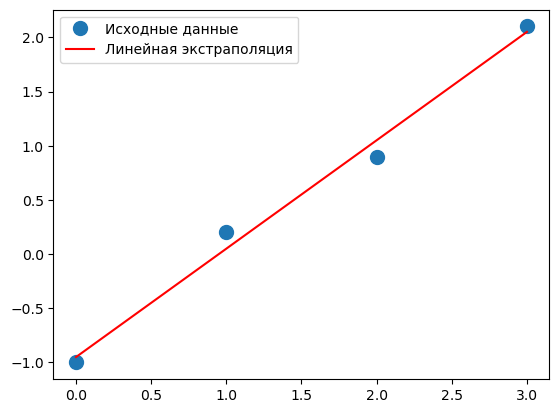

In [ ]:
# Используем метод lstsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

# Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

---

## 1.1.2 Пример

---

Задача:

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

Решение:

[-4.8244332  -3.85231917 -2.81250995 -2.08701416 -1.49463271  0.0589498
  1.15205918  2.38210304  2.93337953  4.34909171  5.30001218]
[25.02795949 16.04905353  8.86410976  3.68860315  1.03087166 -0.31089151
  1.31448985  4.36345393  9.17737161 15.50305701 25.06826507]


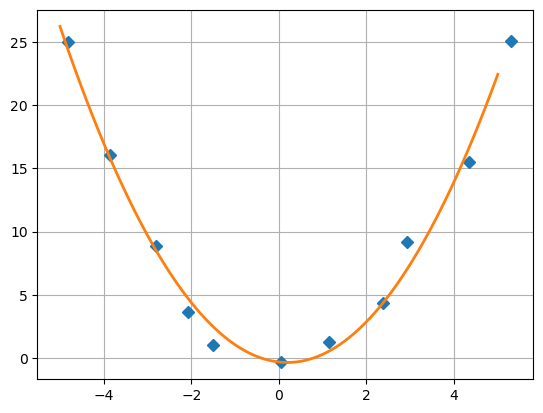

In [ ]:
from numpy import *
from numpy.random import *
# генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# Записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида у = аx^2 + bx + c методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec =linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида вида у = ах^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

---

## 1.1.3 Пример

---

Задача:
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

Решение:

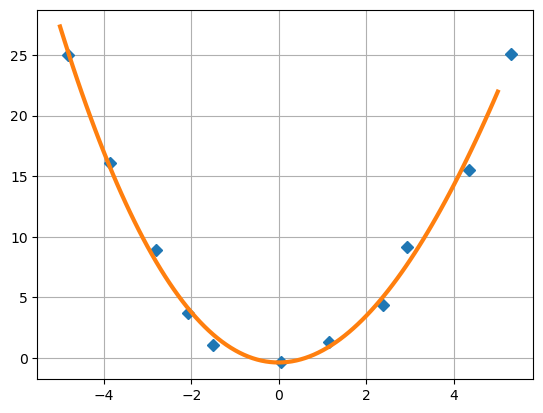

In [ ]:
# нахождение коэффициентов функции вида у = ах^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5,5,101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ах^3 + bx^2 + cx + d, подставляя коэффициенты s[0],s[1],s[2],s[3]
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

---

### Задание
---

Задание:

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

Решение:

0.8615384615384619 -1.803846153846155


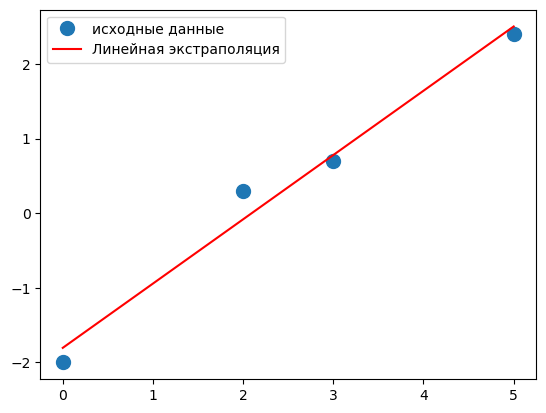

In [ ]:
import numpy as np
x = np.array([0,2,3,5])
y = np.array([-2,0.3,0.7,2.4])

# перепишем линейное уравнение y = mx + c как y = Ap, где
# А = [[x1]] и p = [[m], [c]]
# построим А по х

A = np.vstack([x, np.ones(len(x))]).T
A

# Используем метод lstsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

# Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

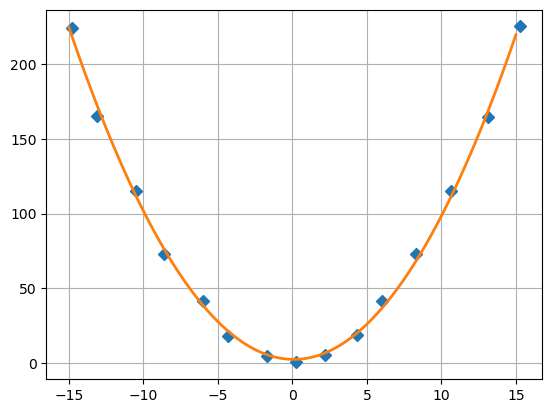

In [ ]:
from numpy import *
from numpy.random import *
# генерируем случайные х и у
delta = 1.0
x = linspace(-15,15,15)
y = x**2 + delta * (rand(15) - 0.5)
x += delta * (rand(15) - 0.5)

# Нахождение коэффициентов функции вида у = аx^2 + bx + c методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(15))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec =linspace(-15, 15, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида вида у = ах^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

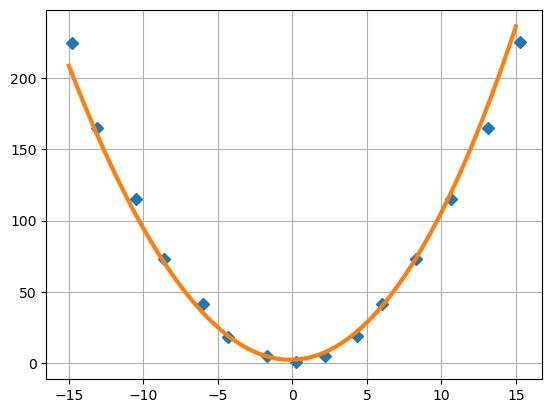

In [ ]:
# нахождение коэффициентов функции вида у = ах^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((-x**3, x**2, x, ones(15))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-15,15,101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ах^3 + bx^2 + cx + d, подставляя коэффициенты s[0],s[1],s[2],s[3]
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

---

## 1.1.4 Пример

---

Задача:

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

Решение:

[0.25623806 0.76094464 0.56211055]
0.00019853055147339715
0.09983263260129654


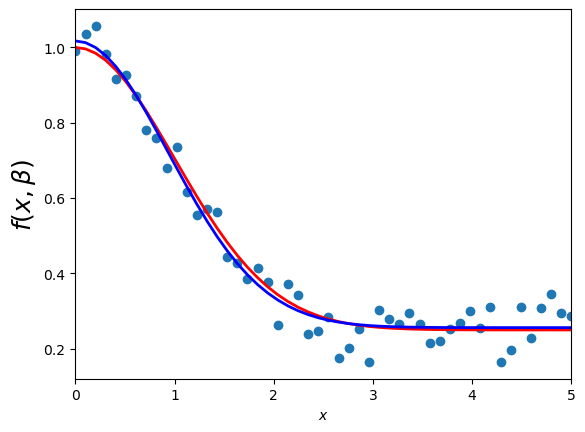

In [ ]:
# добавим шума в данные, сделанные по функции f(x,y) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)

---

## 1.1.5 Пример

---
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:

1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥

2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2

3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)

4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1

Решение:

[0.25017978 0.75269992]
0.00018964946806508117
0.16676073727191748


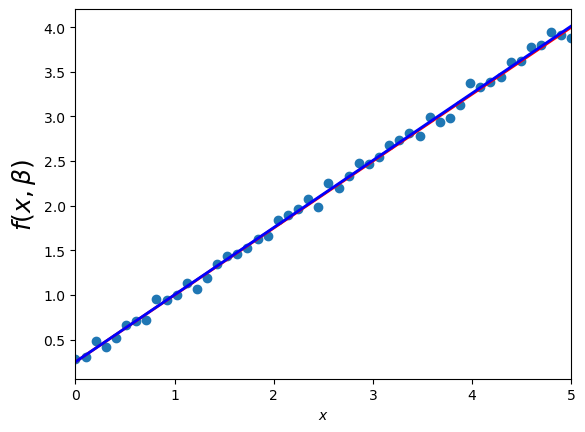

In [ ]:
# решение 1

# добавим шума в данные, сделанные по функции f(x,y) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.26743067 0.73048406 0.5044438 ]
0.00017961052068845852
0.1497763776068568


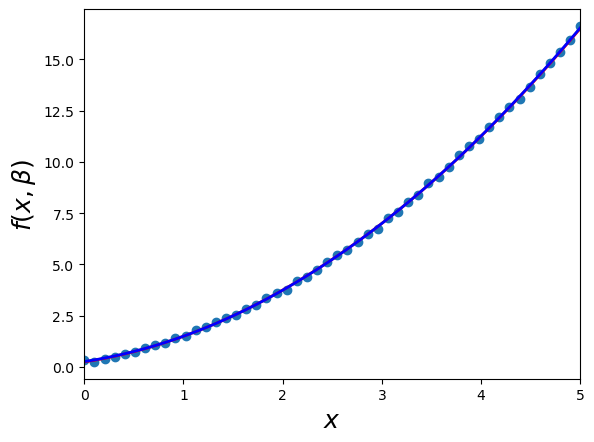

In [ ]:
# решение 2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# добавим шума в данные, сделанные по функции f(x,y) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[-98.50309719 101.49690281]
-2252.2320556640625
0.11039784587380373


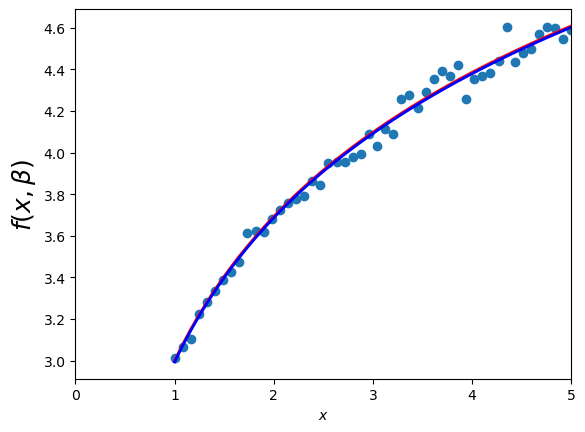

In [ ]:
# решение 3

# добавим шума в данные, сделанные по функции f(x,y) с коэффициентами b = (0.25, 0.75)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 + np.log(x)

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00349592 1.99772038]
5.6133841635259945e-06
0.1319494159548915


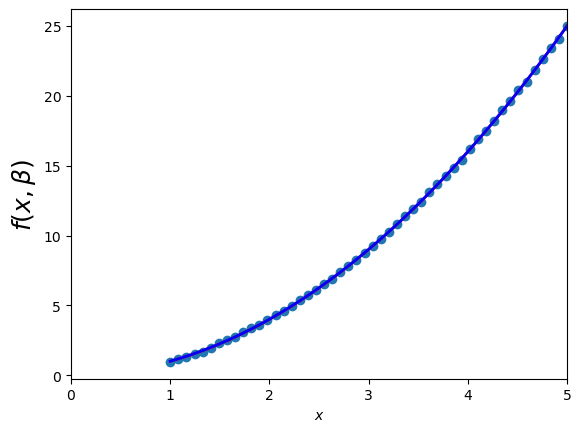

In [ ]:
# решение 4

# добавим шума в данные, сделанные по функции f(x,y) с коэффициентами b = (0.25, 0.75)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00519296 2.00016658]
5.870583001747e-05
0.07506672949750176


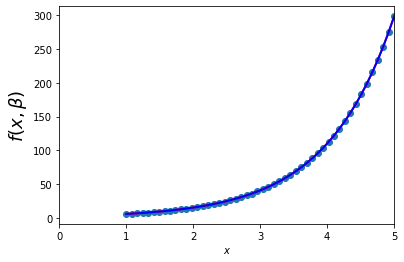

In [ ]:
# решение свое
# возьмем функцию b0 + b1 * e ** x
# добавим шума в данные, сделанные по функции f(x,y) с коэффициентами b = (0.25, 0.75)
from math import e
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * e ** x

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

---

### Задание

---
Задание:

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

Решение:

[0.99299487 2.00501234]
4.5981249897074106e-06
0.11222401344955382


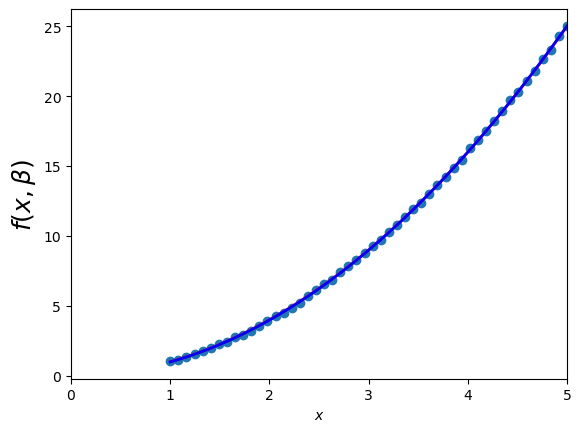

In [ ]:
# добавим шума в данные, сделанные по функции f(x,y) с коэффициентами b = (0.25, 0.75)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

---

#1.2. Теоретический материал – Задачи регрессии

---

**Линейная регрессия** - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

---

## 1.2.1 Пример

---

Задача:

Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

Решение:

In [ ]:
# импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# создадим набор данных для описания взаимосвязи между временем обучения студентов и их успеваемостью
import random
my_dict = {'Учебное время': [0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [ ]:
# исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


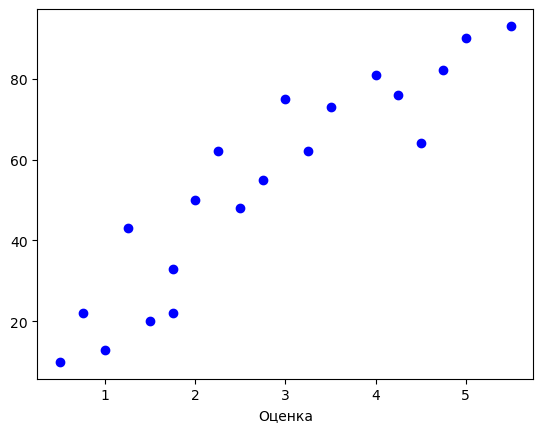

In [ ]:
# нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные с экзамена')
plt.xlabel('Часы')
plt.xlabel('Оценка')
plt.show()

---

### Атрибуты и метки

---

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

# теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы
# приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]
5.475400029908791
[17.02706744]


---

### Прогноз

---

Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код

In [ ]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


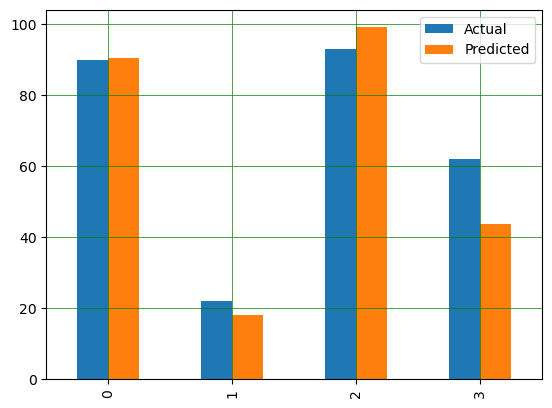

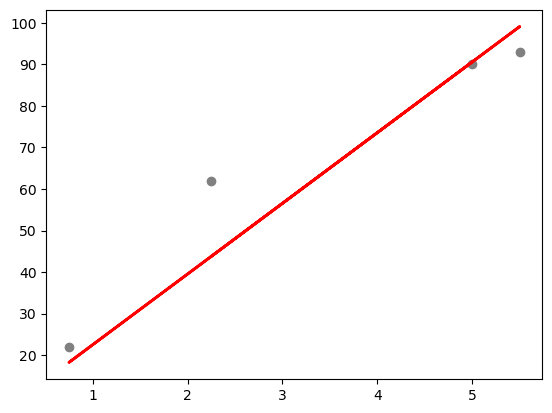

In [ ]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

---

### Задание

---

Задание:

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-
regression/master/Salary_Data.csv)

Найдите коэффициенты линии регрессии. Постройте прогноз.

Решение:

26780.09915062818
[9312.57512673]


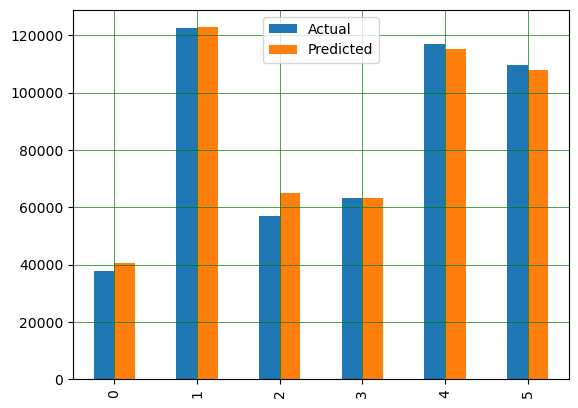

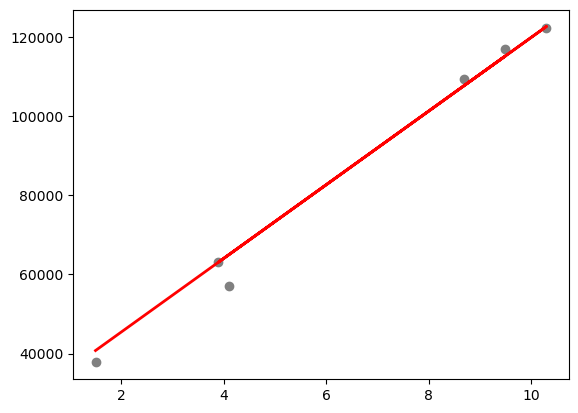

In [ ]:
file = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
X = file.iloc[:, :-1].values
y = file.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

---

#1.3. Теоретический материал – Множественная регрессия

---

В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

---
## 1.3.1 Пример

---

Задача:

Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

Решение:

In [ ]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.

---

### 1.3.2 Пример

---

Задача:

Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

Решение:

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1,df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [ ]:
# изучаем данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [ ]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_.transpose(), X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [ ]:
#Чтобы сделать прогнозы на тестовых данныхБ выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [ ]:
# последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.327269924234307


---

### Задание

---

Задача:

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv

2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

Решение

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

file = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
X = file.iloc[:, :-1].values
y = file.iloc[:, 1].values

# формируем DataFrame из двух списков

df1 = pd.DataFrame(y)
df2 = pd.DataFrame(X)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1,df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3,3,4,5,6,7,8,9,10
0,0.70,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.70,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
# изучаем данные
print(dataset.shape)
dataset.describe()

(1599, 12)


,y,x1,x2,x3,3,4,5,6,7,8,9,10
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,0.179060,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,0.120000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,0.390000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,0.520000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,0.640000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,1.580000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [ ]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_.transpose(), X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,4.654083e-17
x2,1.000000e+00
x3,-2.220446e-16


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,0.470,0.470
1032,0.820,0.820
1002,0.290,0.290
487,0.645,0.645
979,0.450,0.450
...,...,...
794,0.270,0.270
813,0.390,0.390
1322,0.340,0.340
704,0.765,0.765


In [ ]:
# последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3377990876199838e-32


---

### Задание*

---

Задача:

Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

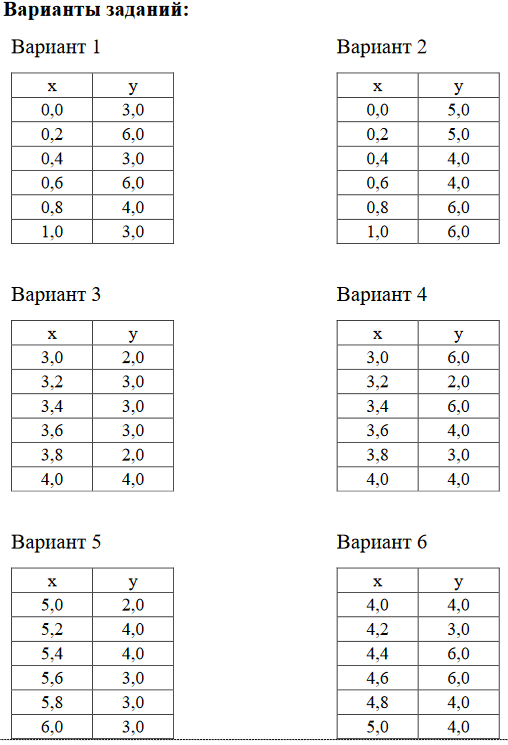

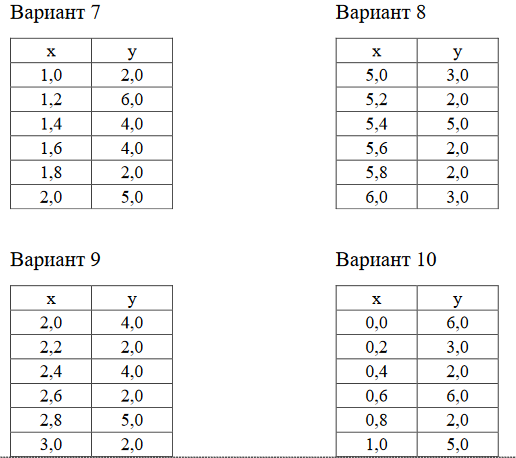

In [ ]:
#Вариант 10
import numpy as np
x=[0.0,0.2,0.4,0.6,0.8,1.0]
y=[3.0,6.0,3.0,6.0,4.0,3.0]
new_y=np.array(y)
new_x=np.array(x)
A=np.vstack([new_x,np.ones(len(new_x))]).T
A

array([[0. , 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.6, 1. ],
       [0.8, 1. ],
       [1. , 1. ]])

In [ ]:
m,c= np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)

-0.42857142857143055 4.3809523809523805


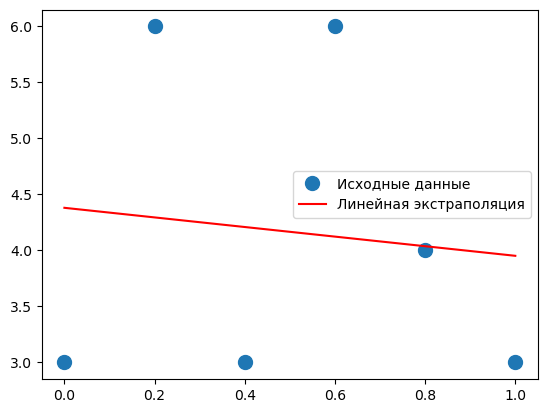

In [ ]:
import matplotlib.pyplot as plt
plt.plot(new_x,new_y,'o', label='Исходные данные', markersize=10)
plt.plot(new_x,m*new_x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

[0.  0.2 0.4 0.6 0.8 1. ]
[3. 6. 3. 6. 4. 3.]
-0.0023516 0.19277 -0.68789


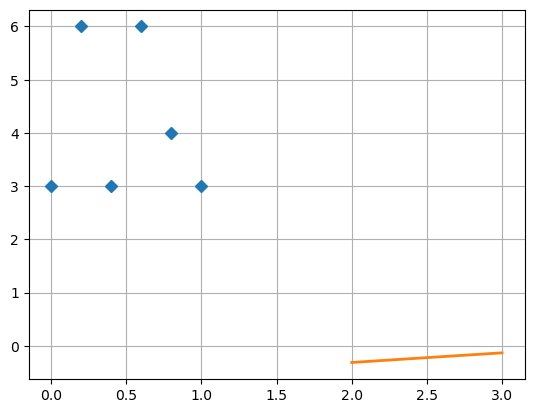

In [ ]:
from numpy import *
from numpy.random import *
print(new_x)
print(new_y)
m=vstack((new_x**2,new_x,ones(6))).T
s=np.linalg.lstsq(m,new_y,rcond=None)[0]
s=[-0.0023516,0.19277,-0.68789]
x_prec=linspace(2,3,11)
plt.plot(new_x,new_y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
print(s[0],s[1],s[2])
plt.savefig('параболанов123.png')